1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of %killbgscripts

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
%matplotlib notebook
from sklearn.datasets import load_iris
df=load_iris()
from sklearn.preprocessing import MinMaxScaler

In [2]:
dir(df)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
flower=pd.DataFrame(df.data ,columns=df.feature_names)

In [7]:
flower


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
flower

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<IPython.core.display.Javascript object>


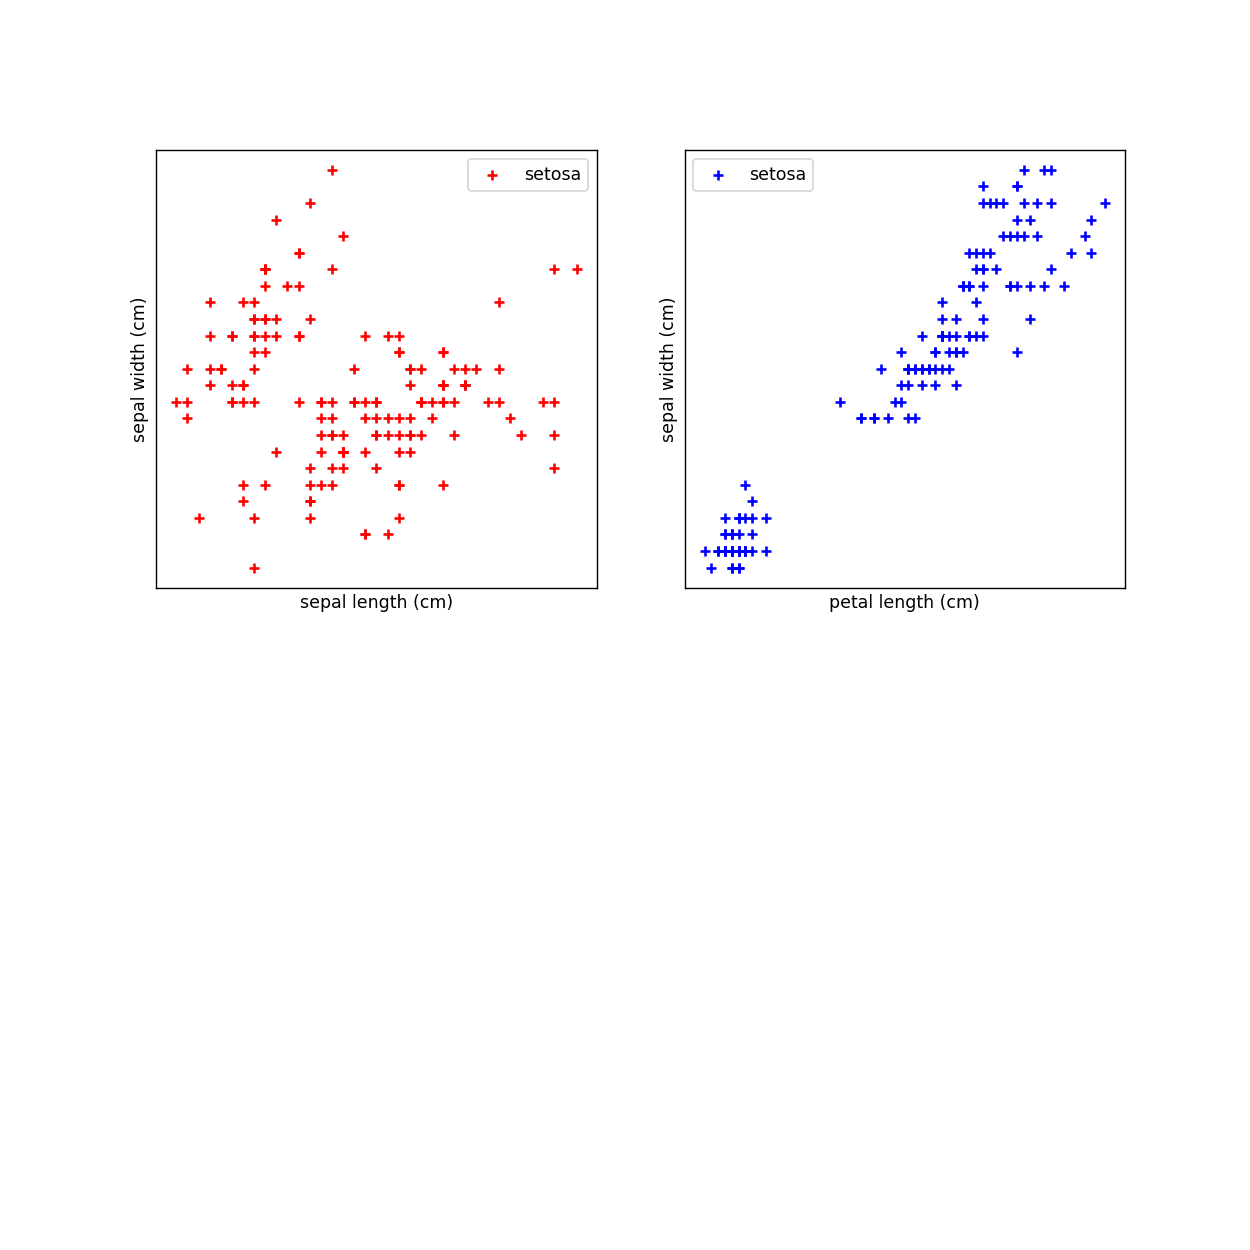

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),
plt.scatter(flower["sepal length (cm)"],flower["sepal width (cm)"], c="red",marker="+",label="setosa")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.xticks([])
plt.yticks([])
plt.legend(loc="best")
plt.show()
plt.subplot(2,2,2),
plt.scatter(flower["petal length (cm)"],flower["petal width (cm)"], c="blue",marker="+",label="setosa")
plt.xlabel("petal length (cm)")
plt.ylabel("sepal width (cm)")
plt.xticks([])
plt.yticks([])
plt.legend(loc="best")
plt.show()

In [11]:
scaler = MinMaxScaler()
scaler.fit(flower[["sepal length (cm)"]])
flower["sepal length (cm)"]=scaler.transform(flower[["sepal length (cm)"]])

#2
scaler.fit(flower[["sepal width (cm)"]])
scaler.transform(flower[["sepal width (cm)"]])
#3
scaler.fit(flower[["petal length (cm)"]])
scaler.transform(flower[["petal length (cm)"]])
#4
scaler.fit(flower[["petal width (cm)"]])
scaler.transform(flower[["petal width (cm)"]])

array([[0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.125     ],
       [0.08333333],
       [0.04166667],
       [0.04166667],
       [0.        ],
       [0.04166667],
       [0.04166667],
       [0.        ],
       [0.        ],
       [0.04166667],
       [0.125     ],
       [0.125     ],
       [0.08333333],
       [0.08333333],
       [0.08333333],
       [0.04166667],
       [0.125     ],
       [0.04166667],
       [0.16666667],
       [0.04166667],
       [0.04166667],
       [0.125     ],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.125     ],
       [0.        ],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.        ],
       [0.04166667],
       [0.04166667],
       [0.08333333],
       [0.08333333],
       [0.04166667],
       [0.20833333],
       [0.125     ],
       [0.08333333],
       [0.04166667],
       [0.041

In [12]:
flower

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,3.5,1.4,0.2
1,0.166667,3.0,1.4,0.2
2,0.111111,3.2,1.3,0.2
3,0.083333,3.1,1.5,0.2
4,0.194444,3.6,1.4,0.2
...,...,...,...,...
145,0.666667,3.0,5.2,2.3
146,0.555556,2.5,5.0,1.9
147,0.611111,3.0,5.2,2.0
148,0.527778,3.4,5.4,2.3


In [13]:
x=flower.drop(["sepal length (cm)","sepal width (cm)"] , axis=1)

In [14]:
point=[]
range_point=range(1,10)
for i in range_point:
    model=KMeans(n_clusters= i)
    model.fit(x)
    point.append(model.inertia_)

<IPython.core.display.Javascript object>


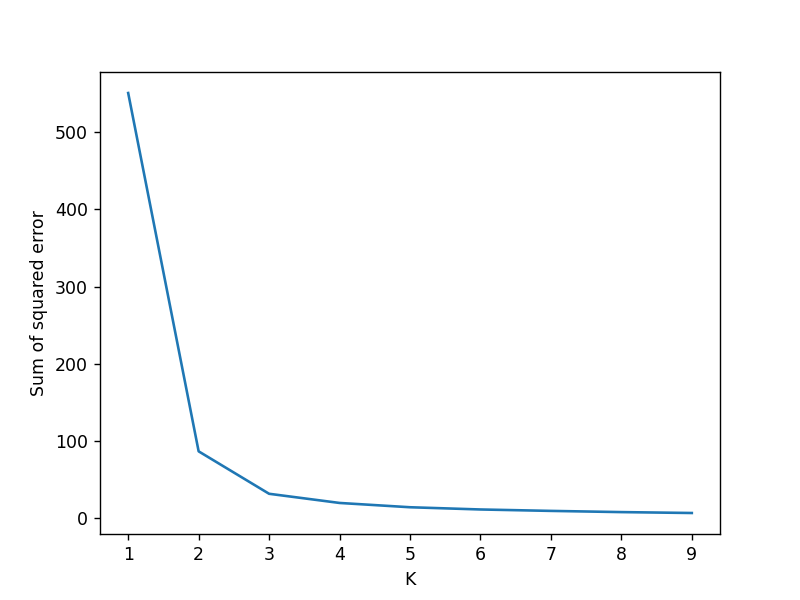

Text(0, 0.5, 'Sum of squared error')

In [15]:
plt.plot(range_point , point)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

In [16]:
final_model=KMeans(n_clusters= 3)

In [17]:
Y_predict=final_model.fit_predict(x)

In [18]:
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
flower["cluster"]=Y_predict

In [20]:
flower

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,3.5,1.4,0.2,0
1,0.166667,3.0,1.4,0.2,0
2,0.111111,3.2,1.3,0.2,0
3,0.083333,3.1,1.5,0.2,0
4,0.194444,3.6,1.4,0.2,0
...,...,...,...,...,...
145,0.666667,3.0,5.2,2.3,1
146,0.555556,2.5,5.0,1.9,1
147,0.611111,3.0,5.2,2.0,1
148,0.527778,3.4,5.4,2.3,1


In [21]:
final_model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [22]:
df1 = flower[flower.cluster==0]
df2 = flower[flower.cluster==1]
df3 = flower[flower.cluster==2]

In [ ]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(final_model.cluster_centers_[:,0],final_model.cluster_centers_[:,1],c="black",label="cen")